In [5]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint

file_path = 'updated_data.csv'
data = pd.read_csv(file_path)
data['Occurred Date'] = pd.to_datetime(data['Occurred Date'], dayfirst=True)

data = data[(data['Occurred Date'] < "2024-04-01") & 
            (data['Offence Group 4'] == 'Selected Offences Against the Person') & 
            (data['Sub-District'].str.contains("derby", case=False, na=False))] #CHANGE DISTRICT HERE

restriction_start = pd.Timestamp('2020-03-01')
restriction_end = pd.Timestamp('2022-12-05')

pre_restriction_data = data[data['Occurred Date'] < restriction_start]
during_restriction_data = data[(data['Occurred Date'] >= restriction_start) & (data['Occurred Date'] <= restriction_end)]

pre_monthly_all = pre_restriction_data.groupby(pre_restriction_data['Occurred Date'].dt.to_period('M')).size()
pre_monthly_alcohol = pre_restriction_data[pre_restriction_data['Alcohol Flag'] == 'Y'].groupby(pre_restriction_data['Occurred Date'].dt.to_period('M')).size()
during_monthly_all = during_restriction_data.groupby(during_restriction_data['Occurred Date'].dt.to_period('M')).size()
during_monthly_alcohol = during_restriction_data[during_restriction_data['Alcohol Flag'] == 'Y'].groupby(during_restriction_data['Occurred Date'].dt.to_period('M')).size()

pre_ratio = pre_monthly_alcohol / pre_monthly_all
during_ratio = during_monthly_alcohol / during_monthly_all

average_pre_ratio = pre_ratio.mean()
average_during_ratio = during_ratio.mean()

pre_data = pd.concat([pre_monthly_all, pre_monthly_alcohol], axis=1, keys=['Total_Crimes', 'Alcohol_Related_Crimes']).dropna()
during_data = pd.concat([during_monthly_all, during_monthly_alcohol], axis=1, keys=['Total_Crimes', 'Alcohol_Related_Crimes']).dropna()

pre_score, pre_p_value, _ = coint(pre_data['Total_Crimes'], pre_data['Alcohol_Related_Crimes'])
during_score, during_p_value, _ = coint(during_data['Total_Crimes'], during_data['Alcohol_Related_Crimes'])

print('Pre-Restrictions Cointegration Test:')
print('Score:', pre_score)
print('P-value:', pre_p_value)
print("Cointegrated:" if pre_p_value < 0.05 else "Not cointegrated")
print("Average ratio of alcohol-related crimes to total crimes pre-restrictions:", average_pre_ratio)

print('\nDuring Restrictions Cointegration Test:')
print('Score:', during_score)
print('P-value:', during_p_value)
print("Cointegrated:" if during_p_value < 0.05 else "Not cointegrated")
print("Average ratio of alcohol-related crimes to total crimes during restrictions:", average_during_ratio)


Pre-Restrictions Cointegration Test:
Score: -4.8674436797518394
P-value: 0.00028641904001113156
Cointegrated:
Average ratio of alcohol-related crimes to total crimes pre-restrictions: 0.684227851849832

During Restrictions Cointegration Test:
Score: -1.8578523761575063
P-value: 0.6012199782903507
Not cointegrated
Average ratio of alcohol-related crimes to total crimes during restrictions: 0.7032631007550145


In [7]:
import pandas as pd

file_path = 'updated_data.csv'
data = pd.read_csv(file_path)

data['Occurred Date'] = pd.to_datetime(data['Occurred Date'], dayfirst=True)

data = data[(data['Occurred Date'] < "2024-04-01") & 
            (data['Offence Group 4'] == 'Selected Offences Against the Person') & 
            (data['Sub-District'].str.contains("Derby", case=False, na=False))]

monthly_all_crimes = data.groupby(data['Occurred Date'].dt.to_period('M')).size()
monthly_alcohol_crimes = data[data['Alcohol Flag'] == 'Y'].groupby(data['Occurred Date'].dt.to_period('M')).size()

monthly_proportion = (monthly_alcohol_crimes / monthly_all_crimes).dropna()

lowest_proportion_month = monthly_proportion.idxmin()
highest_proportion_month = monthly_proportion.idxmax()

print("Month with the lowest proportion of alcohol-related crimes:", lowest_proportion_month)
print("Lowest proportion:", monthly_proportion[lowest_proportion_month])
print("Month with the highest proportion of alcohol-related crimes:", highest_proportion_month)
print("Highest proportion:", monthly_proportion[highest_proportion_month])


Month with the lowest proportion of alcohol-related crimes: 2023-01
Lowest proportion: 0.38461538461538464
Month with the highest proportion of alcohol-related crimes: 2018-01
Highest proportion: 0.8833333333333333


## Carnarvon Analysis

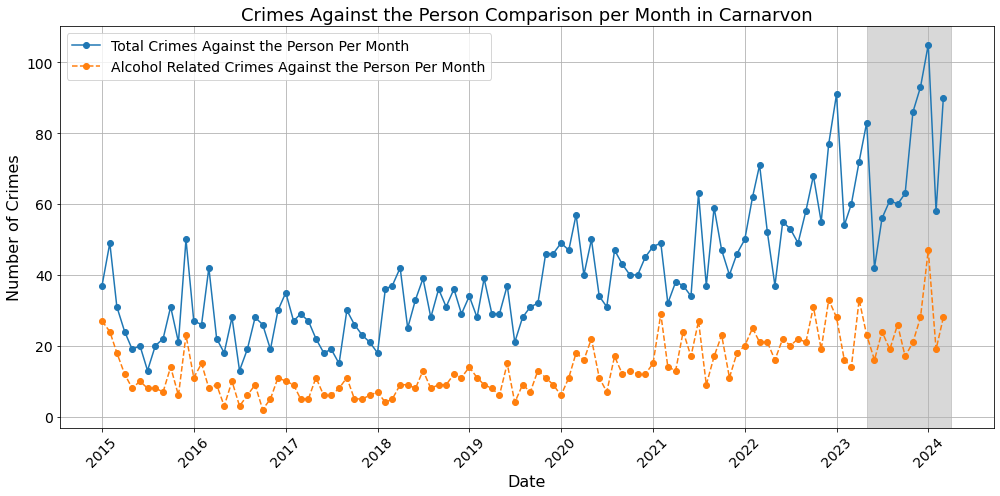

Average % change for alcohol-related crimes pre-restrictions: 14.68%
Average % change for alcohol-related crimes during restrictions: 13.28%
Average % change for all crimes pre-restrictions: 4.99%
Average % change for all crimes during restrictions: 7.63%


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

file_path = 'updated_data.csv'
data = pd.read_csv(file_path)

data['Reported Date'] = pd.to_datetime(data['Reported Date'], dayfirst=True)
data['Occurred Date'] = pd.to_datetime(data['Occurred Date'], dayfirst=True)

data = data[data['Occurred Date'] < "2024-04-01"]
data = data[data['Offence Group 4'] == 'Selected Offences Against the Person']

district = "Carnarvon"

district_data = data[data['Sub-District'].str.contains(district, case=False, na=False)]
district_alcohol_related = district_data[district_data['Alcohol Flag'] == 'Y']

pre_restriction_alcohol = district_alcohol_related[district_alcohol_related['Occurred Date'] < "2023-05-04"]
during_restriction_alcohol = district_alcohol_related[(district_alcohol_related['Occurred Date'] >= "2023-05-04")]

monthly_alcohol_pre = pre_restriction_alcohol.groupby(pre_restriction_alcohol['Occurred Date'].dt.to_period("M")).size()
monthly_alcohol_during = during_restriction_alcohol.groupby(during_restriction_alcohol['Occurred Date'].dt.to_period("M")).size()

monthly_alcohol_pre.index = monthly_alcohol_pre.index.to_timestamp()
monthly_alcohol_during.index = monthly_alcohol_during.index.to_timestamp()

monthly_change_alcohol_pre = monthly_alcohol_pre.pct_change() * 100
monthly_change_alcohol_during = monthly_alcohol_during.pct_change() * 100

average_monthly_change_alcohol_pre = monthly_change_alcohol_pre.mean()
average_monthly_change_alcohol_during = monthly_change_alcohol_during.mean()

monthly_all_crimes = district_data.groupby(district_data['Occurred Date'].dt.to_period("M")).size().to_timestamp()
monthly_alcohol_crimes = district_alcohol_related.groupby(district_alcohol_related['Occurred Date'].dt.to_period("M")).size().to_timestamp()

pre_restriction_district = district_data[district_data['Occurred Date'] < "2023-05-04"]
during_restriction_district = district_data[(district_data['Occurred Date'] >= "2023-05-04")]

monthly_pre = pre_restriction_district.groupby(pre_restriction_district['Occurred Date'].dt.to_period("M")).size()
monthly_during = during_restriction_district.groupby(during_restriction_district['Occurred Date'].dt.to_period("M")).size()

monthly_pre.index = monthly_pre.index.to_timestamp()
monthly_during.index = monthly_during.index.to_timestamp()

common_months = monthly_pre.index.intersection(monthly_during.index)
monthly_pre_common = monthly_pre[common_months]
monthly_during_common = monthly_during[common_months]

percentage_change = ((monthly_during_common - monthly_pre_common) / monthly_pre_common) * 100
average_percentage_change = percentage_change.mean()

monthly_change_pre = monthly_pre.pct_change() * 100
monthly_change_during = monthly_during.pct_change() * 100

average_monthly_change_pre = monthly_change_pre.mean()
average_monthly_change_during = monthly_change_during.mean()

plt.figure(figsize=(14, 7))
plt.plot(monthly_all_crimes.index, monthly_all_crimes.values, marker='o', label='Total Crimes Against the Person Per Month')
plt.plot(monthly_alcohol_crimes.index, monthly_alcohol_crimes.values, marker='o', label='Alcohol Related Crimes Against the Person Per Month', linestyle='--')

plt.axvspan('2023-05-04', '2024-04-01', color='gray', alpha=0.3)

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.title(f'Crimes Against the Person Comparison per Month in {district}', fontsize=18)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Number of Crimes', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

print(f"Average % change for alcohol-related crimes pre-restrictions: {average_monthly_change_alcohol_pre:.2f}%")
print(f"Average % change for alcohol-related crimes during restrictions: {average_monthly_change_alcohol_during:.2f}%")
print(f"Average % change for all crimes pre-restrictions: {average_monthly_change_pre:.2f}%")
print(f"Average % change for all crimes during restrictions: {average_monthly_change_during:.2f}%")


In [9]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint

file_path = 'updated_data.csv'
data = pd.read_csv(file_path)
data['Occurred Date'] = pd.to_datetime(data['Occurred Date'], dayfirst=True)

data = data[(data['Occurred Date'] < "2024-04-01") & 
            (data['Offence Group 4'] == 'Selected Offences Against the Person') & 
            (data['Sub-District'].str.contains("Carnarvon", case=False, na=False))]

restriction_start = pd.Timestamp('2023-05-04')
restriction_end = pd.Timestamp('2024-04-01')

pre_restriction_data = data[data['Occurred Date'] < restriction_start]
during_restriction_data = data[(data['Occurred Date'] >= restriction_start)]

pre_monthly_all = pre_restriction_data.groupby(pre_restriction_data['Occurred Date'].dt.to_period('M')).size()
pre_monthly_alcohol = pre_restriction_data[pre_restriction_data['Alcohol Flag'] == 'Y'].groupby(pre_restriction_data['Occurred Date'].dt.to_period('M')).size()
during_monthly_all = during_restriction_data.groupby(during_restriction_data['Occurred Date'].dt.to_period('M')).size()
during_monthly_alcohol = during_restriction_data[during_restriction_data['Alcohol Flag'] == 'Y'].groupby(during_restriction_data['Occurred Date'].dt.to_period('M')).size()

pre_data = pd.concat([pre_monthly_all, pre_monthly_alcohol], axis=1, keys=['Total_Crimes', 'Alcohol_Related_Crimes']).dropna()
during_data = pd.concat([during_monthly_all, during_monthly_alcohol], axis=1, keys=['Total_Crimes', 'Alcohol_Related_Crimes']).dropna()

pre_ratio = pre_monthly_alcohol / pre_monthly_all
during_ratio = during_monthly_alcohol / during_monthly_all

average_pre_ratio = pre_ratio.mean()
average_during_ratio = during_ratio.mean()

pre_score, pre_p_value, _ = coint(pre_data['Total_Crimes'], pre_data['Alcohol_Related_Crimes'])
during_score, during_p_value, _ = coint(during_data['Total_Crimes'], during_data['Alcohol_Related_Crimes'])

print('Pre-Restrictions Cointegration Test:')
print('Score:', pre_score)
print('P-value:', pre_p_value)
print("Cointegrated:" if pre_p_value < 0.05 else "Not cointegrated")
print("Average ratio of alcohol-related crimes to total crimes pre-restrictions:", average_pre_ratio)

print('\nDuring Restrictions Cointegration Test:')
print('Score:', during_score)
print('P-value:', during_p_value)
print("Cointegrated:" if during_p_value < 0.05 else "Not cointegrated")
print("Average ratio of alcohol-related crimes to total crimes during restrictions:", average_during_ratio)


Pre-Restrictions Cointegration Test:
Score: -6.625124251893683
P-value: 6.498095894084147e-08
Cointegrated:
Average ratio of alcohol-related crimes to total crimes pre-restrictions: 0.34540506682069766

During Restrictions Cointegration Test:
Score: -2.3963825883189966
P-value: 0.3265701883436399
Not cointegrated
Average ratio of alcohol-related crimes to total crimes during restrictions: 0.3385825654461756
